In [3]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from filters import compute_h_z, filter_b_a

In [56]:
def conformal(r, alpha):
    num = (1-r**2)-(2*r*np.sin(alpha))*1j
    den = (1+r**2)+2*r*np.cos(alpha)
    return num/den

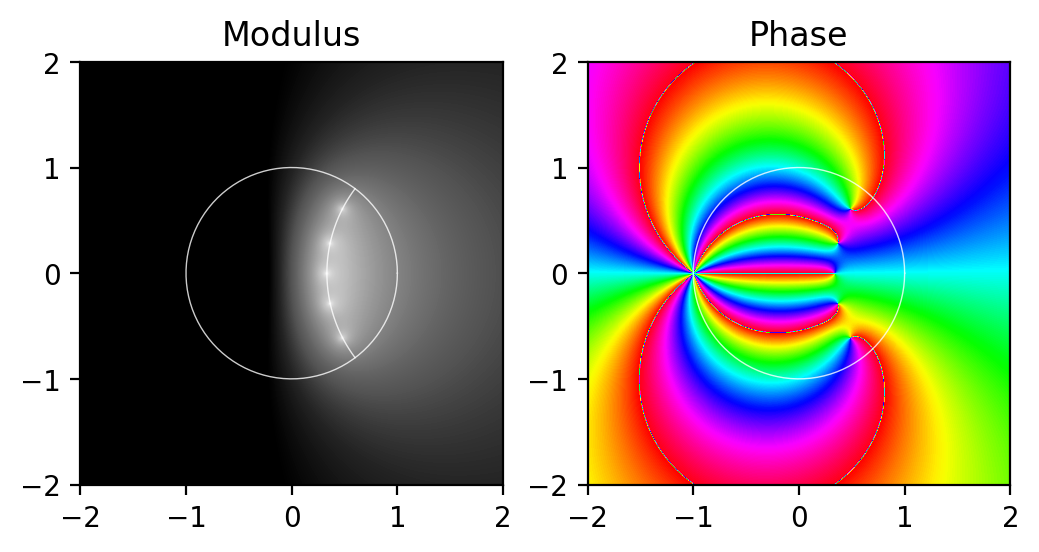

In [94]:
extent = (-2, 2)
r = 0.5
lbo, ubo = extent
x, y = np.meshgrid(np.linspace(lbo, ubo, 1000), np.linspace(lbo, ubo, 1000))
b, a = signal.butter(5, np.angle(conformal(r, -np.pi/2))/np.pi, 'low')
h_z = compute_h_z(a, b, x + 1j * y)
t = np.linspace(0, 2 * np.pi, 100)
plt.figure(dpi=100, figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(10*np.log10(np.abs(h_z)), cmap='Greys_r', extent=[lbo, ubo, lbo, ubo], vmin = -20)
plt.plot(np.cos(t), np.sin(t), c='w', alpha=0.8, linewidth=0.5)


arc = conformal(r, np.linspace(-np.pi/2, np.pi/2))
plt.plot(arc.real, arc.imag, c='w', alpha=0.8, linewidth=0.5)


plt.title('Modulus')
plt.subplot(1, 2, 2)
plt.imshow(np.angle(h_z), cmap='hsv', extent=[lbo, ubo, lbo, ubo])
plt.plot(np.cos(t), np.sin(t), c='w', alpha=0.8, linewidth=0.5)
plt.title('Phase')
plt.show()

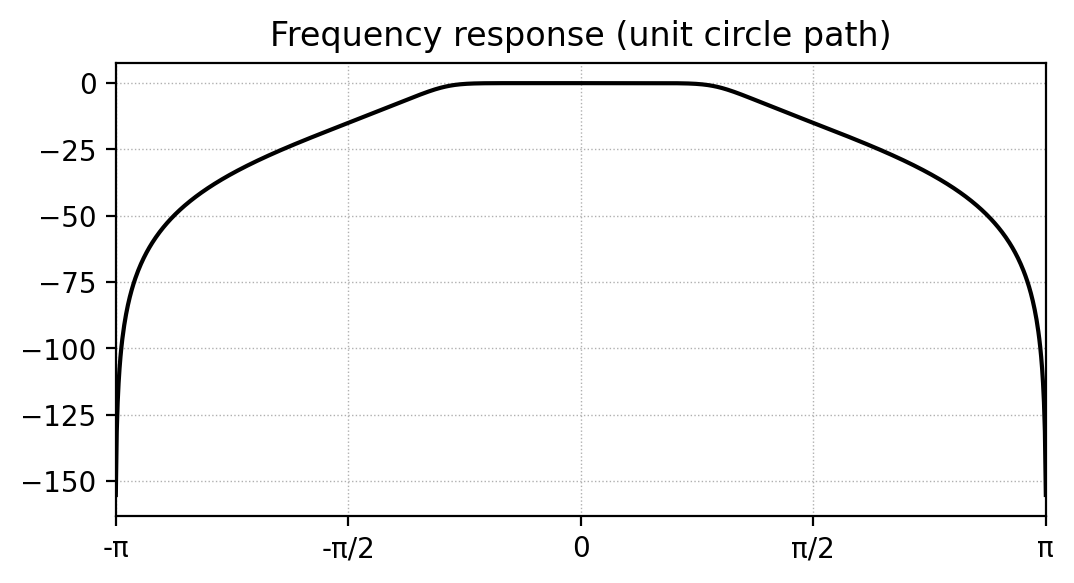

In [95]:
z_path = np.exp(1j*np.linspace(0, 2*np.pi, 1000))
h_z_path = compute_h_z(a, b, z_path)
plt.figure(dpi=100, figsize=(6, 3))
plt.plot(np.linspace(-np.pi, np.pi, z_path.size), 10*np.log10(np.fft.fftshift(np.abs(h_z_path))), c='k')
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi], labels=['-π', '-π/2', '0', 'π/2', 'π'])
plt.grid(which='major', linewidth=0.5, linestyle=':')
plt.title('Frequency response (unit circle path)')
plt.show()

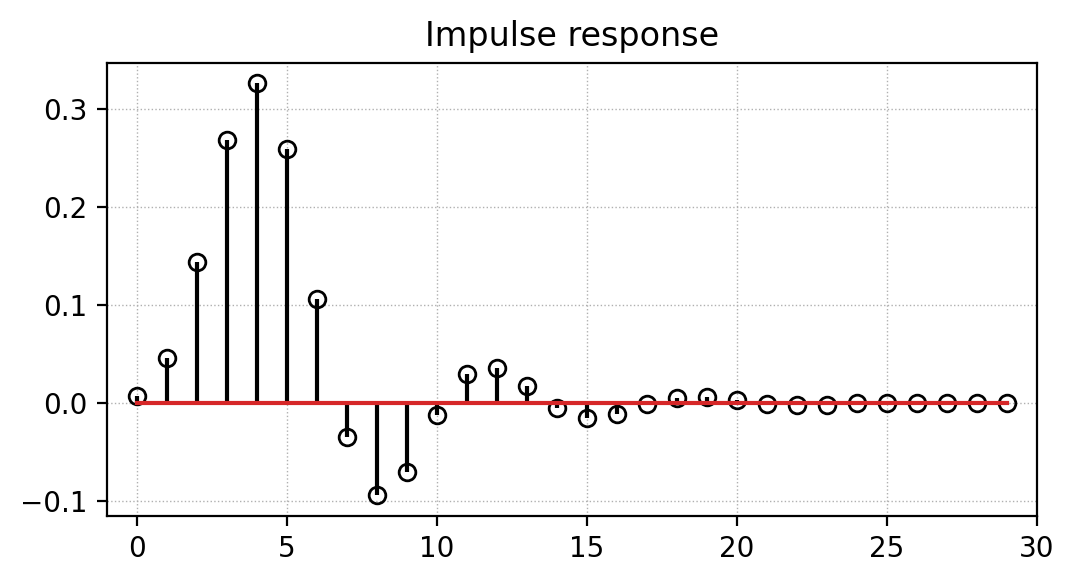

In [96]:
impulse = np.zeros(30)
impulse[0] = 1
ir = filter_b_a(impulse, a, b)
plt.figure(dpi=100, figsize=(6, 3))
m, _, _ = plt.stem(ir, linefmt='k')
m.set_markerfacecolor('none')
m.set_markeredgecolor('k')
plt.grid(which='major', linewidth=0.5, linestyle=':')
plt.xlim([-1, ir.size])
plt.title('Impulse response')
plt.show()